# Applied Data Science and Machine Learning
## A program by IIT Madras and TalentSprint
### Mini Project 04 : Detection of Spam/ham Emails

## Learning Objectives

At the end of the mini project, you will be able to

* Understand the application of machine learning in the detection of spam emails.
* Use a real world dataset.
* Implement various machine learning models.
* Compare between different types of classification methods and their pros and cons.

**Packages used:**  
* `Pandas` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` and `Seaborn` for visualization
*  `sklearn` for the metrics and pre-processing



### Introduction

Machine learning is connected with the field of education related to algorithms which continuously keeps on learning from various examples and then applying them to real-world problems.  Classification is a task of Machine Learning which assigns a label value to a specific class and then can identify a particular type to be of one kind or another. The most basic example can be of the mail spam filtration system where one can classify a mail as either “spam” or “not spam”. You will encounter multiple types of classification challenges and there exist some specific approaches for the type of model that might be used for each challenge.

### Dataset Description

The collection consists of '0030228easyham.tar.bz2' and '20030228_spam.tar.bz2' taking from https://spamassassin.apache.org/old/publiccorpus/ i.e. _Apache SpamAssassin’s public datasets_. There are 2500 ham and 500 spam emails in the dataset.


In [24]:
!pip install wget


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import wget
import zipfile
import os

In [22]:
# Download the dataset
url = 'https://cdn.extras.talentsprint.com/ADSMI/Datasets/spam_or_not_spam.zip'
filename = wget.download(url)

# Unzip the dataset
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('spam_or_not_spam')

# Optional: Remove the zip file after extraction
os.remove(filename)

print("Dataset downloaded and extracted.")

Dataset downloaded and extracted.


In [19]:
# import the libraries used for machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

In [21]:
import pandas as pd

file_path = 'spam_or_not_spam/spam_or_not_spam.csv'
data = pd.read_csv(file_path)

# Print the top 5 data points
print(data.head())

                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0


### **Exercise 1**: Perform the following

- Exploratory Data Analysis (2 points)
- Preprocessing (1 point)

In [25]:
spam_counts = data['label'].value_counts()  # Change 'label' to the actual column name if different
print(spam_counts)

label
0    2500
1     500
Name: count, dtype: int64


In [27]:
!pip install matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


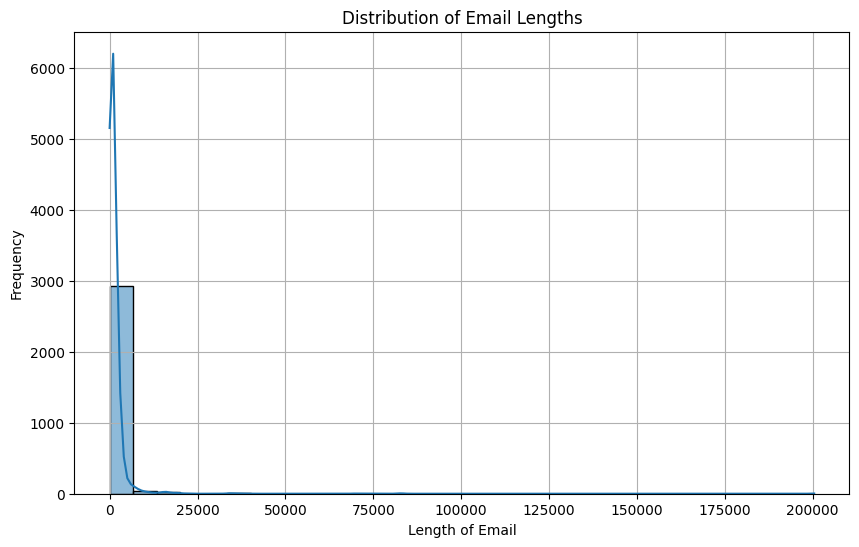

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values in the email column and fill or drop them
data = data[data['email'].notna()]

# Calculate the length of each email
data['email_length'] = data['email'].apply(len)

# Plot the distribution of email lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['email_length'], bins=30, kde=True)
plt.title('Distribution of Email Lengths')
plt.xlabel('Length of Email')
plt.ylabel('Frequency')
plt.grid()
plt.show()

### **Exercise 2**:
* Implement Count Vectorizer on Train and Test Data (1 Point)

In [32]:
!pip install scikit-learn




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from sklearn.model_selection import train_test_split

# Assume 'label' is the column for spam/not spam and 'email' is the feature
X = data['email']  # Change this to the actual feature column if different
y = data['label']  # Change this to the actual label column if different

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the train and test sets
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 2399
Test set size: 600


In [34]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the CountVectorizer on the training data and transform both train and test data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Print the shape of the resulting matrices
print(f"Shape of training data vectorized: {X_train_vectorized.shape}")
print(f"Shape of testing data vectorized: {X_test_vectorized.shape}")

Shape of training data vectorized: (2399, 31318)
Shape of testing data vectorized: (600, 31318)


### **Exercise 3** (4 Points)

Train the model using the 4 ML models:

- Logistic Regression
- SVM
- Naive Bayes
-Decision Tree

**Logistic Regression**

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

For notational ease, we assume that the target takes values in the set {0,1} for data point . Once fitted, the predict_proba method of LogisticRegression predicts the probability of the positive class P(y_i=1|X_i) as 1/(1+exp(-X_i*w-b)).


**SVM**

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
SVM algorithm helps to find the best line or decision boundary; this best boundary or region is called as a hyperplane. SVM algorithm finds the closest point of the lines from both the classes. These points are called support vectors. The distance between the vectors and the hyperplane is called as margin. And the goal of SVM is to maximize this margin. The hyperplane with maximum margin is called the optimal hyperplane.
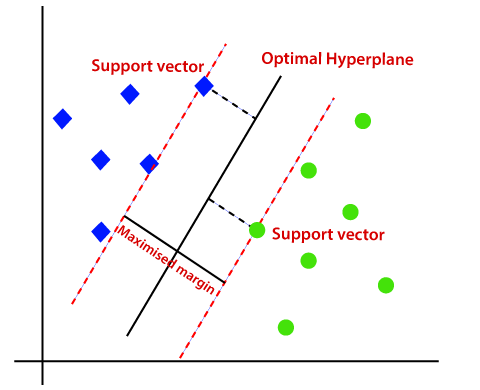


**Decision Tree**

Decision Tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

Construction of Decision Tree: A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions. The construction of a decision tree classifier does not require any domain knowledge or parameter setting, and therefore is appropriate for exploratory knowledge discovery. Decision trees can handle high-dimensional data. In general decision tree classifier has good accuracy. Decision tree induction is a typical inductive approach to learn knowledge on classification.

Confusion Matrix:
[[499   1]
 [  2  98]]


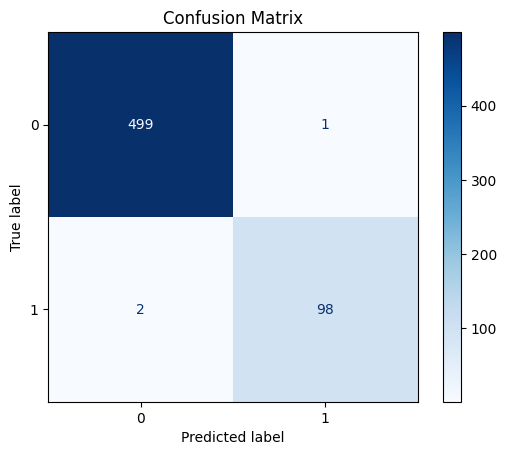

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Train the model
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[498   2]
 [  0 100]]


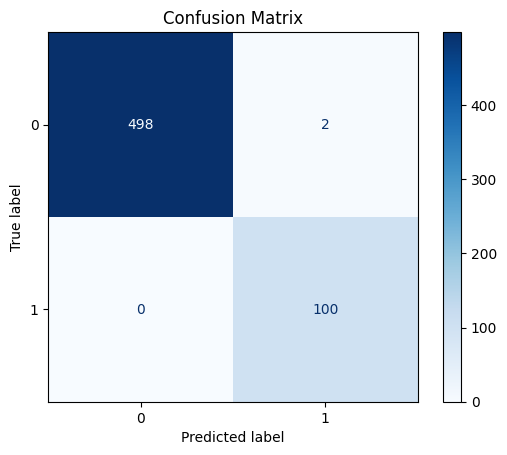

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize the SVM model
svm_model = SVC(kernel='linear')  # You can choose other kernels like 'rbf' if needed

# Train the model
svm_model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_vectorized)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[500   0]
 [  5  95]]


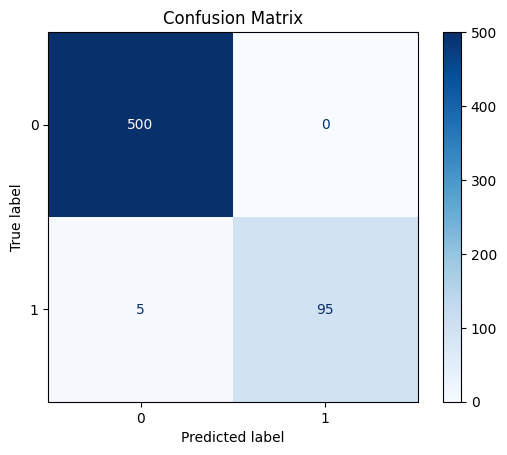

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_vectorized)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[484  16]
 [  7  93]]


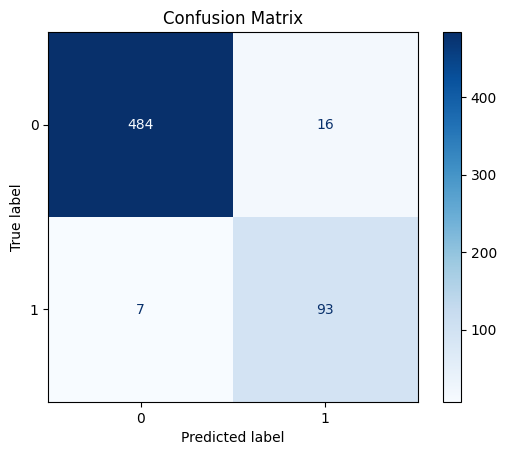

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_vectorized)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### **Exercise 4**:
* Obtain the Confusion Matrices for all models (2 Point)